In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from sklearn.linear_model import LinearRegression as linreg
from sklearn.model_selection import train_test_split as ttsplit
from sklearn.metrics import mean_squared_error as mserror
from sklearn.ensemble import RandomForestRegressor as rfreg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
housing = pd.read_csv('AmesHousing.csv')

In [3]:
def split_train_and_test_data(dataset: pd.DataFrame, features: list[str], target: str) -> tuple:
    """
    splits data in to test and training data. Only works with two data types.

    Parameters:
    dataset(pd.DataFrame): Dataset which contains the data which is to be extracted.
    features(list[str]): List of names of columns from the dataset which is to be assigned as features.
    target(str): Name of column from the dataset which is to be assigned as target. 

    returns: tuple with training and testing data. 
    """

    features = dataset[features].values
    target = dataset[target].values

    features_train, features_test, target_train, target_test = ttsplit(features, target, test_size=0.2, random_state=42)
    return features_train, features_test, target_train, target_test

In [4]:

def evaluate_model(model: Union[linreg, rfreg], target_test, target_predicton, features_test):
    """
    Evaluates and displays mean square error and r-squared value between two data sets.

    Parameters:
    model(linreg, rfreg): AI model which is to be evaluated.
    target_test(): target-values from test data.
    target_prediction(): target-vale predictions based on training data.
    featutes_test(): feature-values from test data.
    """
    
    mse = mserror(target_test, target_predicton)
    r_squared = model.score(features_test, target_test)
    #displays mean square error
    print(f"Mean Squared Error: {mse.round(0).astype(int)}")
    #displays r-squared
    print(f"R-squared: {r_squared}")

In [5]:
def visualize_ai_model(y_test, y_pred, x_axis: list[str], y_axis: str):
    """
    Displays a graph compairong one set of values to another.

    Parameters:
    y_test(array): Data which is being compared to the other. Will be sortd in ascending order of the other dataset.
    y_pred(array): Defult data. Will be sorted in ascending order.
    x_axis(str): Label for x-axis.
    y_axis(ste): Label for y axis.
    """

    sorted_indices = np.argsort(y_test)  # Get indices to sort y_test in increasing order
    sorted_y_test = y_test[sorted_indices]  # Actual values sorted
    sorted_y_pred = y_pred[sorted_indices]  # Corresponding predicted values sorted

    plt.figure(figsize=(12, 6))

    plt.plot(sorted_y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)

    plt.plot(sorted_y_pred, label='Predicted Values', color='red', marker='x', linestyle='', markersize=5)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title('Comparison of Actual vs. Predicted Values')
    plt.legend()

    plt.show()

In [6]:
def generate_regression_model(dataset: pd.DataFrame, features: list[str], target: str):
    """
    creates, tests and dispays the accuracy of a liear regression model. Only works with two data types.

    parameters:
    dataset(pd.DataSet): Dataset which is to be used to train and test the ai.
    features(list[str]): Columns from the dataset which is to be used as features for the model.
    target(str): The column from the dataset which is to be predicted by the AI-model.
    """

    features_train, features_test, target_train, target_test = split_train_and_test_data(dataset, features, target)

    model = linreg()
    model.fit(features_train, target_train)

    y_pred = model.predict(features_test)

    print('Model type: linear regression')
    print(f"Regression line formula: {model.intercept_} + x{model.coef_}")
    evaluate_model(model, target_test, y_pred, features_test)

    visualize_ai_model(target_test, y_pred, features, target)

In [7]:
def generate_random_forrest_model(dataset: pd.DataFrame, features: list[str], target: str):
    """
    creates, tests and displays the accuracy of a random forrest ai model.

    parameters:
    dataset(pd.DataSet): Dataset which is to be used to train and test the ai.
    feaatures(list[str]): Columns from the dataset which is to be used as features for the model.
    target(str): The column from the dataset which is to be predicted by the AI-model.
    """

    feature_train, feature_test, target_train, target_test = split_train_and_test_data(dataset, features, target)

    model = rfreg(n_estimators=100, random_state=42)
    model.fit(feature_train, target_train)

    target_pred = model.predict(feature_test)

    print('Model type: random forrest')

    evaluate_model(model, target_test, target_pred, feature_test)

    visualize_ai_model(target_test, target_pred, features, target)

Model type: linear regression
Regression line formula: -89311.54045190802 + x[44174.67082795]
Mean Squared Error: 2796154625
R-squared: 0.651245661518071


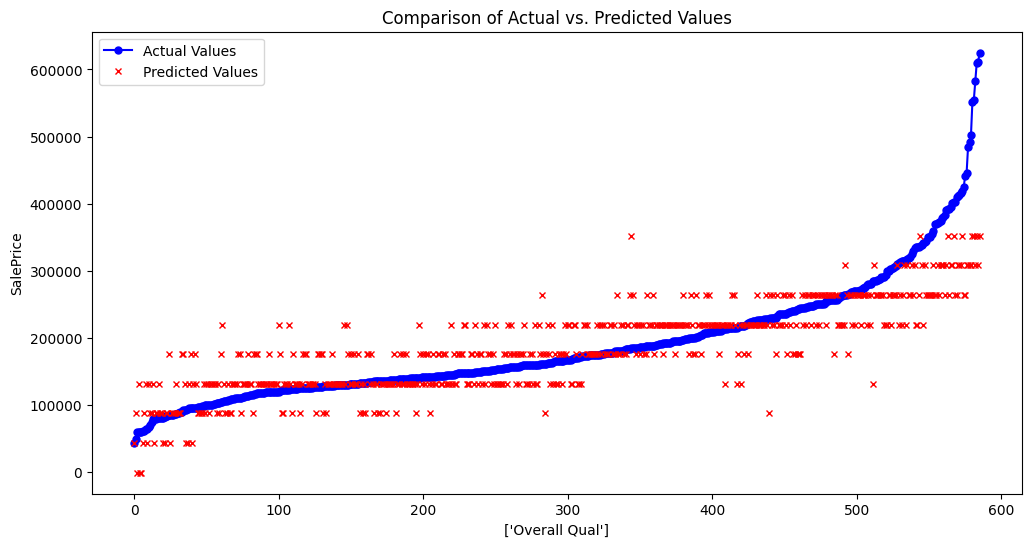

In [8]:
generate_regression_model(housing, ['Overall Qual'], 'SalePrice')

Model type: random forrest
Mean Squared Error: 2202459935
R-squared: 0.7252950710727633


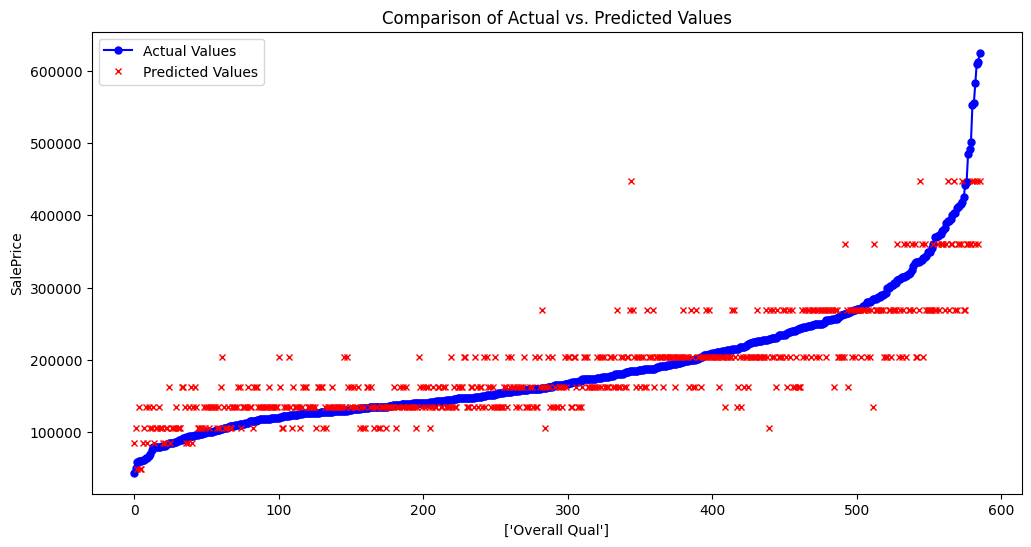

In [16]:
generate_random_forrest_model(housing, ['Overall Qual'], 'SalePrice')

Model type: linear regression
Regression line formula: -2553287.161131087 + x[1386.37904367]
Mean Squared Error: 5284337220
R-squared: 0.34090356988553994


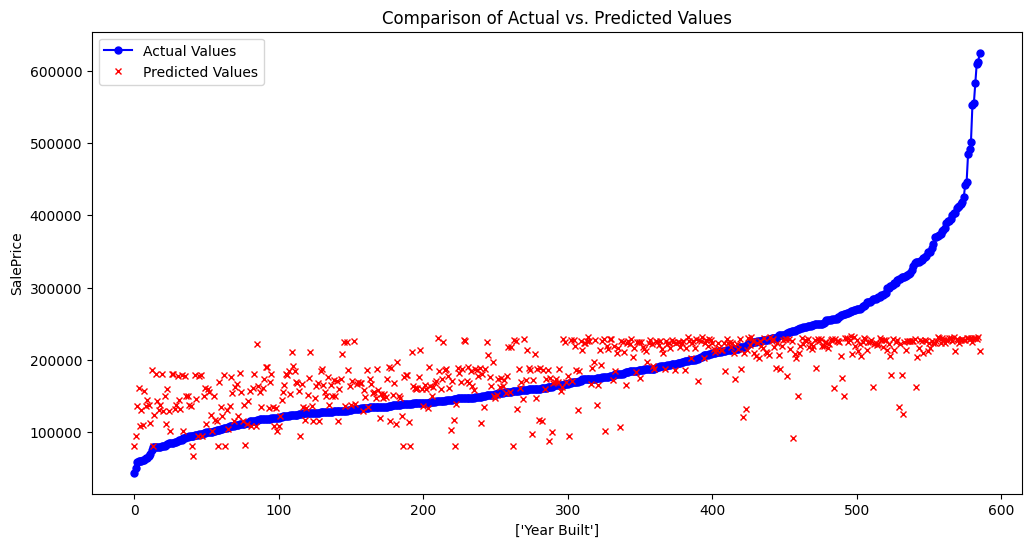

In [10]:
generate_regression_model(housing, ['Year Built'], 'SalePrice')

Model type: random forrest
Mean Squared Error: 4487921296
R-squared: 0.4402376718631983


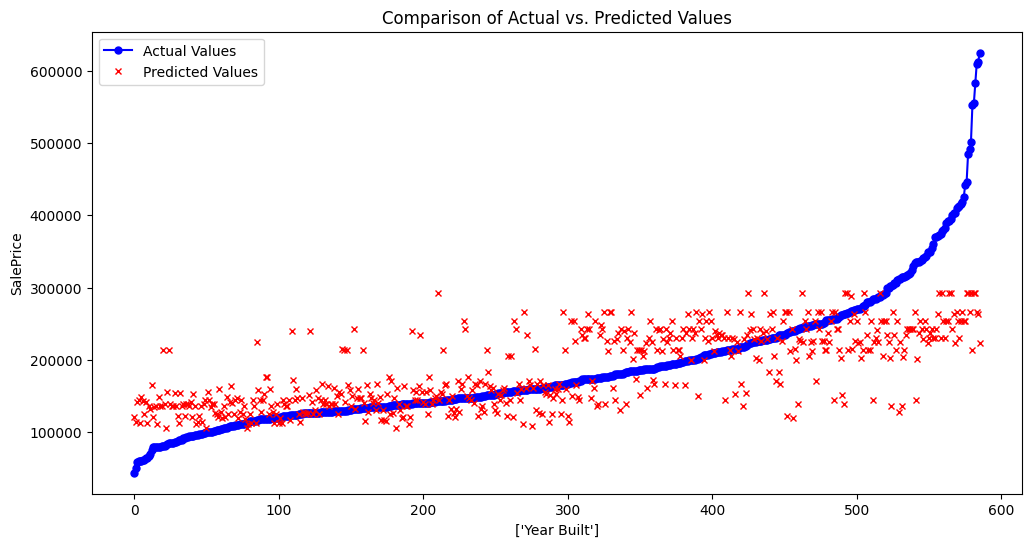

In [11]:
generate_random_forrest_model(housing, ['Year Built'], 'SalePrice')

Model type: linear regression
Regression line formula: -3631921.0156088644 + x[1920.69047241]
Mean Squared Error: 5471050013
R-squared: 0.31761555278825615


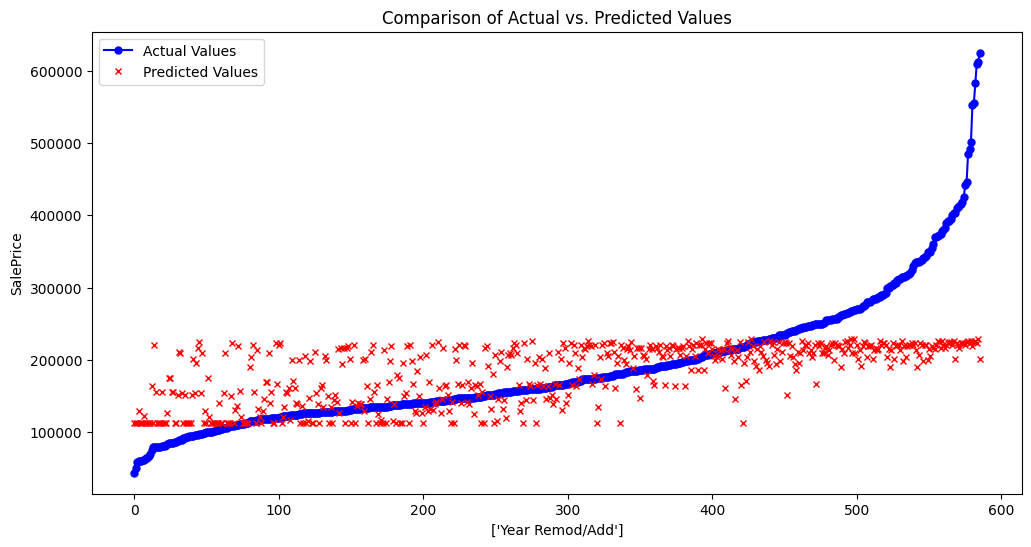

In [12]:
generate_regression_model(housing, ['Year Remod/Add'], 'SalePrice')

Model type: random forrest
Mean Squared Error: 5264176487
R-squared: 0.3434181457037786


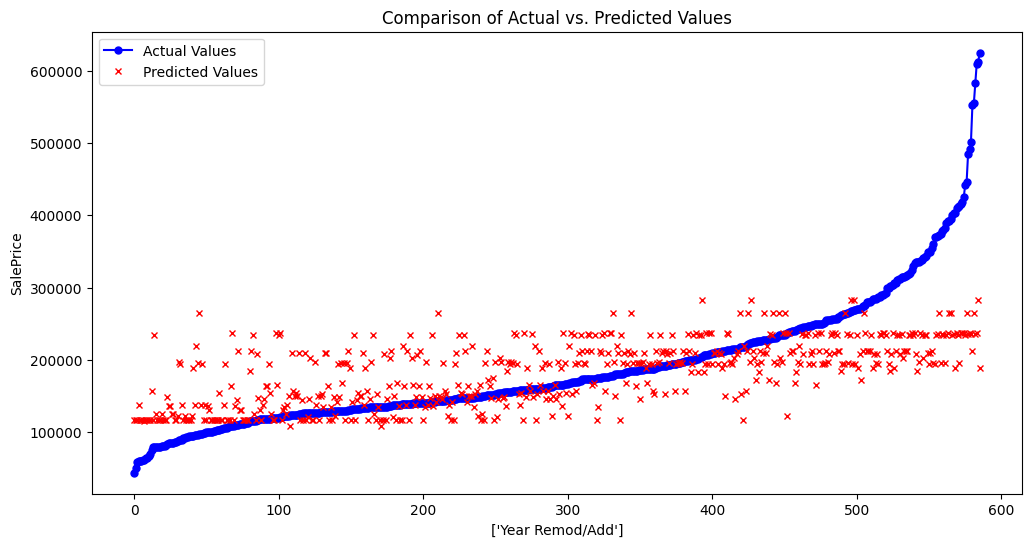

In [13]:
generate_random_forrest_model(housing, ['Year Remod/Add'], 'SalePrice')

Model type: random forrest
Mean Squared Error: 2067779505
R-squared: 0.742093278092491


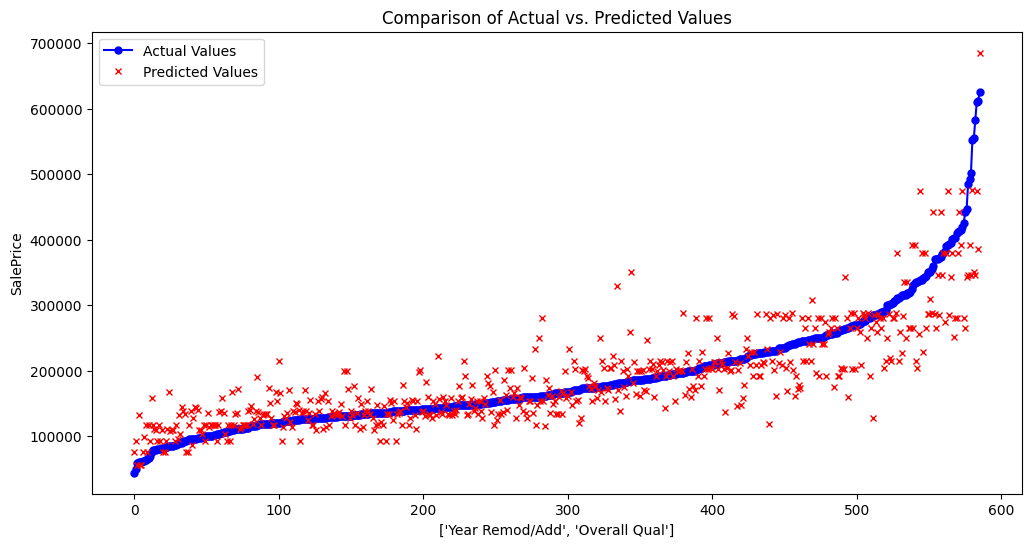

In [15]:
generate_random_forrest_model(housing, ['Year Remod/Add', 'Overall Qual'], 'SalePrice')